In [1]:
# Importación de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Abrimos el csv
data = pd.read_csv('youtoxic_english_1000.csv')
data.head(7)

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False
5,Ugg9a6FtoXdxmXgCoAEC,04kJtp6pVXI,here people his facebook is https://www.facebo...,True,False,False,False,False,True,False,False,False,False,True,False
6,Ugga9KzkNDGvlXgCoAEC,04kJtp6pVXI,"Check out this you tube post. ""Black man goes ...",True,False,False,False,False,True,True,False,False,False,False,False


<AxesSubplot: xlabel='IsToxic', ylabel='count'>

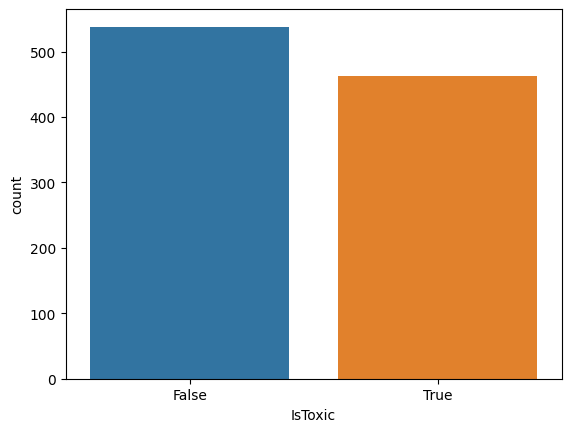

In [3]:
#Comprobamos si los datos estan balanceados si es Istoxic o no
sns.countplot(x ='IsToxic', data = data)

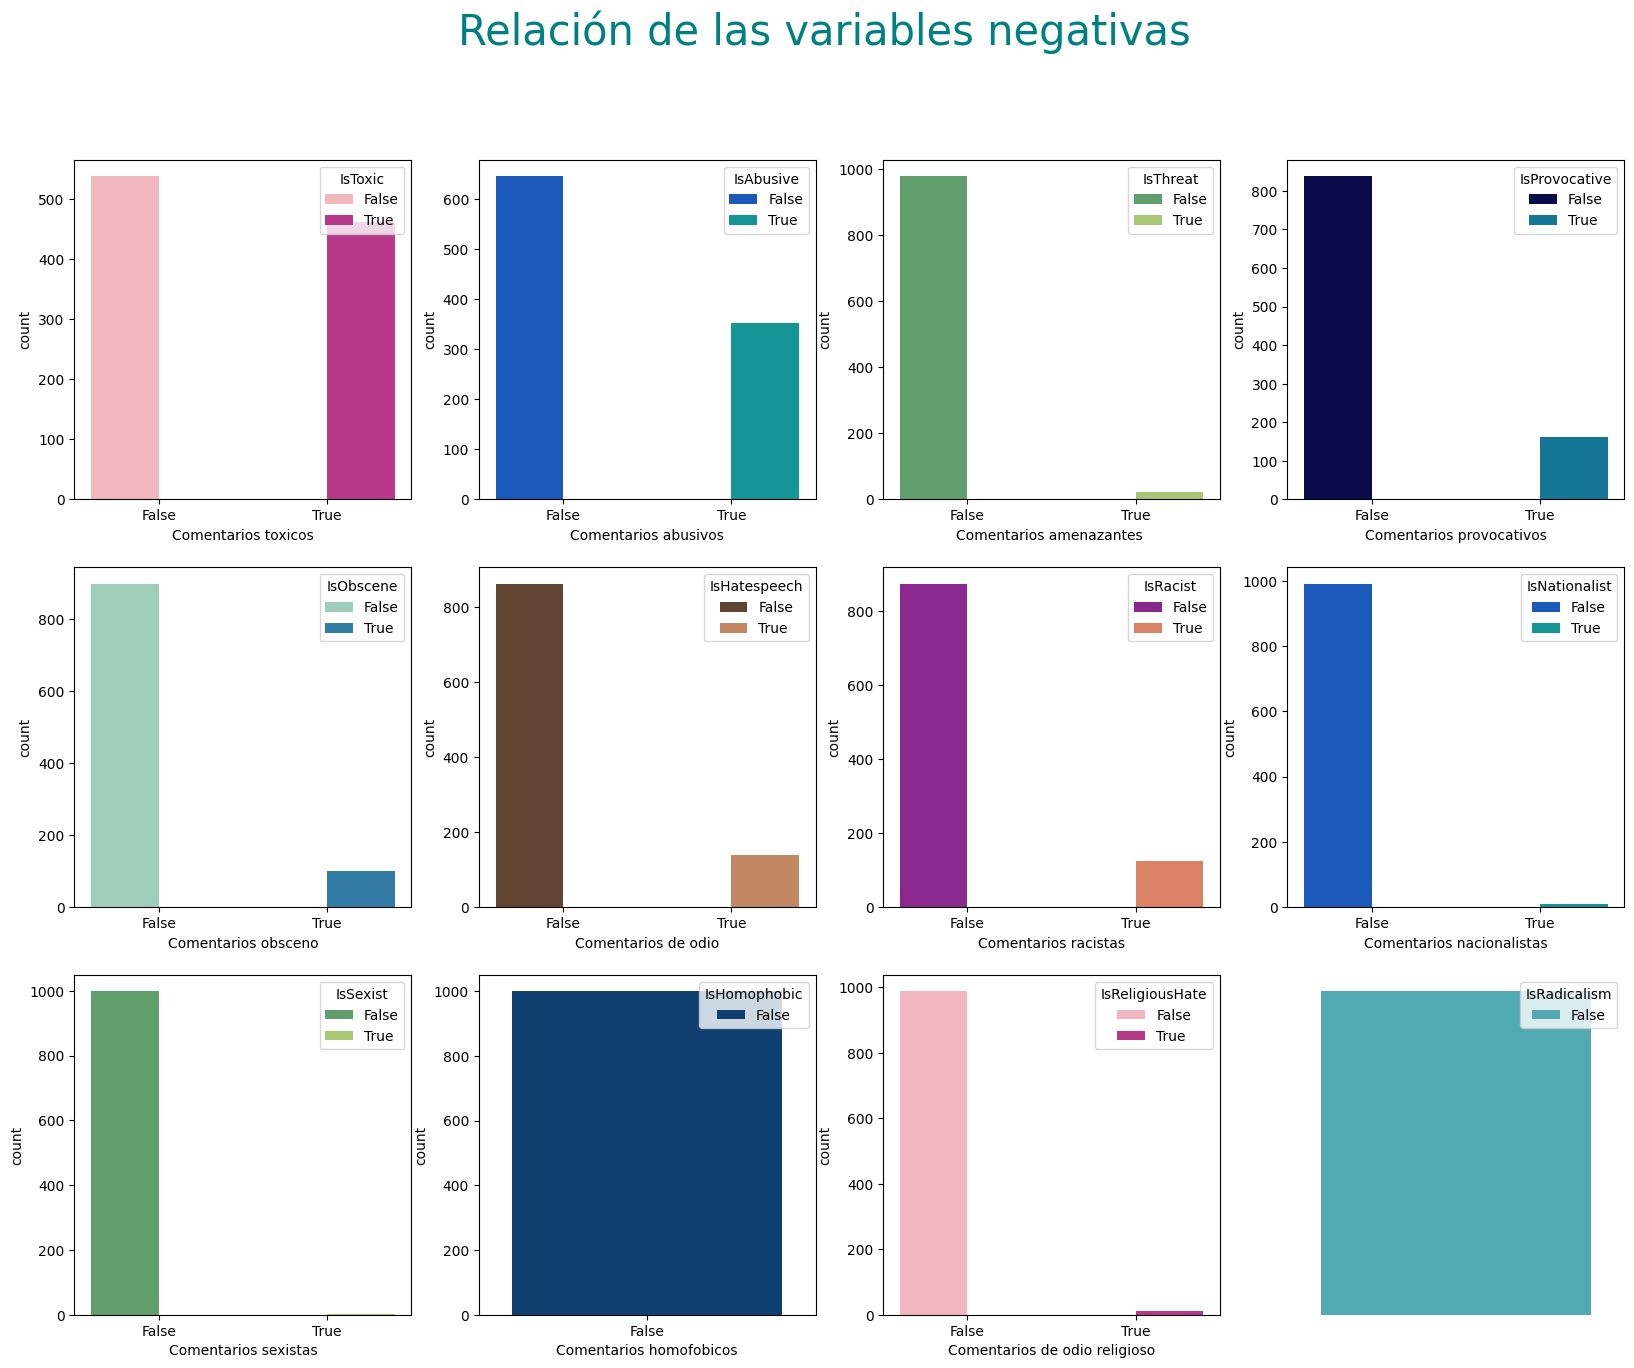

In [4]:
#Se crea un grafico para visualizar de manera simultanea todas las variables en relacion a stroke
fig, ax = plt.subplots(3, 4, figsize = (20, 15))
ax[2, 3].axis('off')

plt.suptitle('Relación de las variables negativas', fontsize = 30, color = 'teal')

ax1 = sns.countplot(x ='IsToxic', data= data, hue= 'IsToxic', ax= ax[0, 0], palette= 'RdPu')
ax1.set(xlabel = 'Comentarios toxicos')

ax2 = sns.countplot(x ='IsAbusive', data= data, hue= 'IsAbusive', ax= ax[0, 1], palette= 'winter')
ax2.set(xlabel = 'Comentarios abusivos')

ax3 = sns.countplot(x ='IsThreat', data= data, hue= 'IsThreat', ax= ax[0, 2], palette= 'summer')
ax3.set(xlabel = 'Comentarios amenazantes ')

ax4 = sns.countplot(x ='IsProvocative', data= data, hue= 'IsProvocative', ax= ax[0, 3], palette= 'ocean')
ax4.set(xlabel = 'Comentarios provocativos')

ax5 = sns.countplot(x ='IsObscene', data= data, hue= 'IsObscene', ax= ax[1, 0], palette= 'YlGnBu')
ax5.set(xlabel = 'Comentarios obsceno')

ax6 = sns.countplot(x ='IsHatespeech', data= data, hue= 'IsHatespeech', ax= ax[1, 1], palette= 'copper')
ax6.set(xlabel = 'Comentarios de odio')

ax7 = sns.countplot(x ='IsRacist', data= data, hue= 'IsRacist', ax= ax[1, 2], palette= 'plasma')
ax7.set(xlabel = 'Comentarios racistas')

ax8 = sns.countplot(x ='IsNationalist', data= data, hue= 'IsNationalist', ax= ax[1, 3], palette= 'winter')
ax8.set(xlabel = 'Comentarios nacionalistas')

ax9 = sns.countplot(x ='IsSexist', data= data, hue= 'IsSexist', ax= ax[2, 0], palette= 'summer')
ax9.set(xlabel = 'Comentarios sexistas')

ax10 = sns.countplot(x ='IsHomophobic', data= data, hue= 'IsHomophobic', ax= ax[2, 1], palette= 'ocean')
ax10.set(xlabel = 'Comentarios homofobicos')

ax11 = sns.countplot(x ='IsReligiousHate', data= data, hue= 'IsReligiousHate', ax= ax[2, 2], palette= 'RdPu')
ax11.set(xlabel = 'Comentarios de odio religioso')

ax12 = sns.countplot(x ='IsRadicalism', data= data, hue= 'IsRadicalism', ax= ax[2, 3], palette= 'YlGnBu')
ax12.set(xlabel = 'Comentarios radicalistas')

plt.show()

In [5]:
#Decripcion del dataset
data.describe()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
count,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,13,997,2,2,2,2,2,2,2,2,2,1,2,1
top,Ugg2KwwX0V8-aXgCoAEC,9pr1oE34bIM,run them over,False,False,False,False,False,False,False,False,False,False,False,False
freq,1,274,3,538,647,979,839,900,862,875,992,999,1000,988,1000


In [6]:
#Información del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [7]:
#Comprobamos si existen valores nulos
data.isnull().sum(axis = 0)

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [8]:
#Comprobamos los datos duplicados
data_duplicadas = data[data.duplicated()]
len(data_duplicadas)

0

<AxesSubplot: >

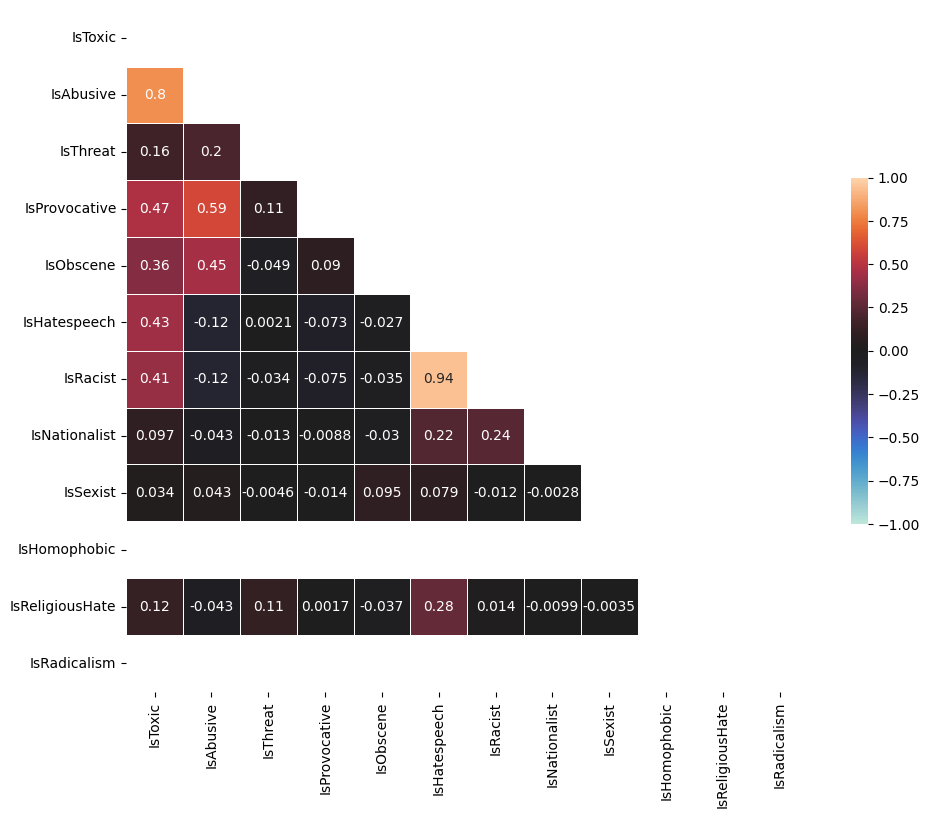

In [9]:
#Mapa de calor con las variables
mask = np.triu(np.ones_like(data.corr(), dtype=bool))

# Configuramos el matplotlib
f, ax = plt.subplots(figsize=(11, 9))

# Ploteamos el heatmap
cmap = sns.diverging_palette(20, 220, n=200)
sns.heatmap(data.corr(), mask=mask, vmax=1., vmin=-1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

Variables que no tienen valores verdaderos

In [10]:
data.IsHomophobic.value_counts()

False    1000
Name: IsHomophobic, dtype: int64

In [11]:
data.IsRadicalism.value_counts()

False    1000
Name: IsRadicalism, dtype: int64

In [12]:
data.VideoId.value_counts()

9pr1oE34bIM    274
04kJtp6pVXI    172
cT14IbTDW2c    146
dG7mZQvaQDk    112
TZxEyoplYbI    104
bUgKZMSxr3E     39
8HB18hZrhXc     38
4rCweDxDqdw     37
Dt9-byUhPdg     34
#NAME?          16
dDbRyFIkNII     10
XRuCW80L9mA     10
5vF4si3hoRA      8
Name: VideoId, dtype: int64

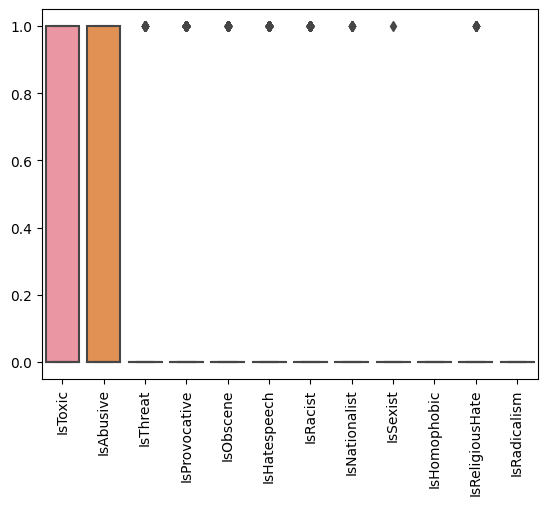

In [13]:
sns.boxplot(data=data)
plt.xticks(rotation=90)
plt.show()

## 3. Limpieza de datos

In [14]:
#
import re 
import string 
def clean_text_round1(text): 
    '''Nos elimina palabras sin sentido, signos de puntuación, números, espacios en blanco y corchetes''' 
    text = text.lower() 
    text = re.sub('\[.*?\]', '', text) 
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\w*\d\w*', '', text) 
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    return text 

round1 = lambda x: clean_text_round1(x) 

In [55]:
text_clean = data["Text"].apply(round1)
text_clean

0      if only people would just take a step back and...
1      law enforcement is not trained to shoot to app...
2      dont you reckon them black lives matter banner...
3      there are a very large number of people who do...
4      the arab dude is absolutely right he should ha...
                             ...                        
995    i remember that they sent in the national defe...
996    stats dont represent the problem race baiting ...
997    the quote from the mother wow that hit hard ve...
998                              this video is so racist
999          god the narrator has such an annoying lisp 
Name: Text, Length: 1000, dtype: object

In [16]:
# Limpiamos emojis
import re
def remove_emojis(data_clean):
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data_clean)

In [54]:
final_text = data_clean.apply(remove_emojis)
final_text

0      if only people would just take a step back and...
1      law enforcement is not trained to shoot to app...
2      dont you reckon them black lives matter banner...
3      there are a very large number of people who do...
4      the arab dude is absolutely right he should ha...
                             ...                        
995    i remember that they sent in the national defe...
996    stats dont represent the problem race baiting ...
997    the quote from the mother wow that hit hard ve...
998                              this video is so racist
999          god the narrator has such an annoying lisp 
Name: Text, Length: 1000, dtype: object

# Tokenización

import string
punctuation = set(string.punctuation)

def tokenize(sentence):
    tokens = []
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character.lower())
        if new_token:
            tokens.append("".join(new_token))
    return tokens


token= data_final.apply(tokenize)

In [57]:
istoxic = data["IsToxic"].astype("uint8")
result = pd.concat([data_final, istoxic], axis=1)
result

,Text,IsToxic
0,if only people would just take a step back and...,0.0
1,law enforcement is not trained to shoot to app...,1.0
2,dont you reckon them black lives matter banner...,1.0
3,there are a very large number of people who do...,0.0
4,the arab dude is absolutely right he should ha...,0.0
...,...,...
996,stats dont represent the problem race baiting ...,1.0
997,the quote from the mother wow that hit hard ve...,0.0
998,this video is so racist,0.0
999,god the narrator has such an annoying lisp,0.0


In [58]:
# Importación spaCy
import spacy
import en_core_web_sm

In [59]:


nlp = spacy.load("en_core_web_sm")
result["tokenizacion"] = final_text.apply(lambda x: nlp.tokenizer(x))
result


0               (if, only, people, would, just, take, a, step,...
1               (law, enforcement, is, not, trained, to, shoot...
2               (do, nt, you, reckon, them, black, lives, matt...
3               (there, are, a, very, large, number, of, peopl...
4               (the, arab, dude, is, absolutely, right, he, s...
                                      ...                        
996             (stats, do, nt, represent, the, problem, race,...
997             (the, quote, from, the, mother, wow, that, hit...
998                                 (this, video, is, so, racist)
999             (god, the, narrator, has, such, an, annoying, ...
tokenizacion    0      (if, only, people, would, just, take, a...
Name: Text, Length: 1001, dtype: object

In [ ]:
resul.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1001 entries, 0 to texto_token
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Text          1001 non-null   object 
 1   IsToxic       1000 non-null   float64
 2   tokenizacion  1000 non-null   object 
dtypes: float64(1), object(2)
memory usage: 31.3+ KB


# Split

In [23]:
from sklearn.model_selection import train_test_split
train_text,test_text, train_labels, test_labels = train_test_split(result["Text"], 
                                                                    result["IsToxic"],
                                                                    stratify=data["IsToxic"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 750, testing examples 250


# Entrenamiento

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)

train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

train_X.shape

(750, 3907)

# Modelo

In [33]:
#Se imprtan las librerias de los modelos de prediccion de clasificacion
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

#Librerías de los modelos de ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

#Librerías de xgb
import xgboost as xgb
import lightgbm 
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

import multiprocessing
from multiprocessing import Pool
from sklearn.model_selection import RepeatedKFold



In [34]:
#Librerías de las metricas que se usarán.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [40]:
#Empezamos con la elaboracion de la matriz de confusion y metricas de cada modelo de prediccion para comparar los resultados.
def train_evaluate(nombre_modelo, modelo):
    mod=modelo(class_weight= "balanced")#No todos los modelos tienen como atributo a class_weight
    mod.fit(train_text, train_labels)
    
    y_predict = mod.predict(test_text)
            
    #Metricas de test  
    
    accur = accuracy_score(test_labels, y_predict)
    preci = precision_score(test_labels, y_predict)
    recal = recall_score(test_labels, y_predict)
    f1 = f1_score(test_labels, y_predict)
    class_repor = classification_report(test_labels, y_predict)
    
    
    #Metricas de train
    y_pred_train= mod.predict(train_text)

    accur_train = accuracy_score(train_labels, y_pred_train)
    preci_train = precision_score(train_labels, y_pred_train)
    recal_train = recall_score(train_labels, y_pred_train)
    f1_train = f1_score(train_labels, y_pred_train)
    
    print()
    print(f"Recall: {recal}")
    print(f"Precision: {preci}")
    print(f"F1_score: {f1}")
    print(f"Accuracy: {accur}")
    print()
    print("***********************************************************************")
    print()
    print(f"recall_score_train: {recal_train}")
    print(f"precision_score_train: {preci_train}")
    print(f"f1_score_train: {f1_train}")
    print(f"accuracy_score_train: {accur_train}")
    print()
    print(f"Reporte de Clasificación:")
    print()
    print(class_repor)
    print()



In [41]:
#Se imprimen los resultados, con los modelos que admiten el atributo "class_weight".

#train_evaluate("KNeighborsClassifier",KNeighborsClassifier )
#train_evaluate("SVC",SVC )
train_evaluate("LogisticRegression",LogisticRegression )
#train_evaluate("LinearDiscriminantAnalysis",LinearDiscriminantAnalysis )
#train_evaluate("GaussianNB",GaussianNB )

train_evaluate("GradientBoostingClassifier",GradientBoostingClassifier )
train_evaluate("XGBClassifier",XGBClassifier )
train_evaluate("RandomForestClassifier",RandomForestClassifier )
#train_evaluate("AdaBoostClassifier",AdaBoostClassifier )

train_evaluate("LGBMClassifier",LGBMClassifier )
#train_evaluate("CatBoostClassifier",CatBoostClassifier )


ValueError: could not convert string to float: 'people say blacks play the victim but according to the comments its our fault that  the elected officals are racists whites had a good thing going in missouri but they had to be racist  all white folks do is point fingers  take these punk bitches out of power  we goin back to racism deport everyone else   '

In [38]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
                          #Neural Network: MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier(),
                                 
}


for name, model in models.items():
    model.fit(train_text, train_labels)
    print(name + " Entrenado.")


ValueError: could not convert string to float: 'people say blacks play the victim but according to the comments its our fault that  the elected officals are racists whites had a good thing going in missouri but they had to be racist  all white folks do is point fingers  take these punk bitches out of power  we goin back to racism deport everyone else   '

In [25]:
from sklearn.svm import LinearSVC


classifier = LinearSVC()
classifier.fit(train_X, train_labels)

LinearSVC()

# Métricas

In [26]:

predicciones = classifier.predict(test_X)

accuracy = accuracy_score(test_labels, predicciones)

print(f"Accuracy: {accuracy:.4%}")

Accuracy: 70.4000%
